# SYDE556/750 Assignment 4: Nengo and Dynamics

- Due Date: March 20th (midnight)
- Total marks: 10 (10% of final grade)
- Late penalty: 1 mark per day
- For this assignment, you must use Nengo, which can be downloaded from http://nengo.ai.
    - Feel free to look through the examples folder before doing this assignment.
- You can also use Nengo GUI if you'd like, see the nengo.ai website as well.

## 1) Building an ensemble of neurons

Make a new model and inside that model make an ensemble of neurons.  It should have 100 neurons, and represent a 1-dimensional space.  The intercepts should be between -1 and 1, and the maximum firing rates should be between 100Hz and 200Hz.  $\tau_{RC}$ should be 0.02s and $\tau_{ref}$ should be 0.002s.

Note: You don't need to run the model over time for this question.

1. [1 mark] Plot the tuning curves. Plot the representation accuracy plot ( 𝑥  and  𝑥̂   on the same plot). Compute and report the RMSE.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import nengo

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>


RMSE : 0.0030670737357055473



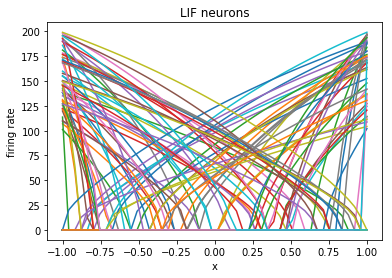

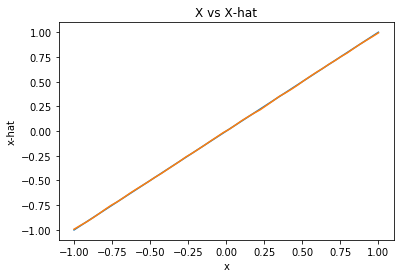

In [27]:
from nengo.dists import Uniform

model = nengo.Network(label='Neurons using Nengo')

with model:
    neurons = nengo.Ensemble(100, dimensions=1,max_rates=Uniform(100,200), 
                             neuron_type = nengo.LIFRate(tau_rc=0.02, tau_ref=0.002))
    connection = nengo.Connection(neurons, neurons)

simulator = nengo.Simulator(model)
x, A = tuning_curves(neurons, simulator)

plt.figure()
plt.plot(x, A)
plt.title('LIF neurons')
plt.xlabel('x')
plt.ylabel('firing rate')

decoders = simulator.data[connection].weights.T
xhat = np.dot(A, decoders)

plt.figure()
plt.title("X vs X-hat")
plt.plot(x, x)
plt.plot(x, xhat)
plt.xlabel('x')
plt.ylabel('x-hat')

print('\nRMSE :',np.sqrt(np.average((x-xhat)**2)))
print("")

2. [1 mark] What happens to the RMSE as the radius increases? Why? Provide four example points (i.e., RMSE at various radiuses). (Note: Nengo will automatically rescale the intercepts as the radius increases.)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>


RMSE with radius : [1, 2, 3, 4, 5]  are  [0.0038046498828808533, 0.007971534655419905, 0.01160717783364193, 0.014367929385688507, 0.019182804651337308]  respectively.


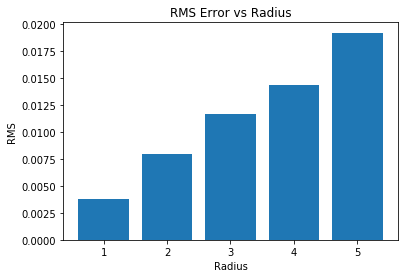

In [54]:
radius = [1,2,3,4,5]
rms_errors = []
np.random.seed(3)
for r in radius:
    neurons.radius = r
    simulator = nengo.Simulator(model)
    x, A = nengo.utils.ensemble.tuning_curves(neurons, simulator)
    decoders = simulator.data[connection].weights.T
    xhat = np.dot(A, decoders)
    rms_errors.append(np.sqrt(np.average((x-xhat)**2)))

print('\nRMSE with radius :',radius,' are ',rms_errors, ' respectively.')

plt.bar(radius,rms_errors, tick_label=radius)
plt.title("RMS Error vs Radius")
plt.xlabel("Radius")
plt.ylabel("RMS")
plt.show();

# neurons.radius = 1

### Comment
As the radius increases, so does the RMSE. This is because there are the same number of neurons are spread over a wider range of inputs and cannot represent the input as accurately.

The 'radius' is the representational radius of the ensemble. In most of the examples, we use a unit radius to represent stimuli from -1 to 1 in one dimension or around the unit circle in two dimensions. Increasing the radius means that the neuron ensemble is tuned, via decoding, to represent stimuli in a larger range of values. The RMSE increases as this radius increases because we simulate over -1 to 1 linearly, so essentially the increased radius is doing a multipliative transformation on the input.

3. [0.5 marks] What happens to the RMSE and the tuning curves as $\tau_{ref}$ changes between 1-5ms? Show plots.  Why?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>


RMSE with T-Ref : [0.001, 0.002, 0.003, 0.004, 0.005]  are  [0.0033059058897033362, 0.003985767327709952, 0.004324679493448242, 0.004974546396783783, 0.007062576340954987]  respectively.


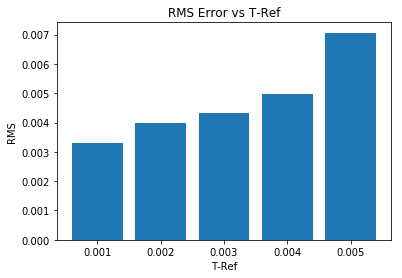

In [75]:
tref_list = [0.001,0.002,0.003,0.004,0.005]
rms_errors = []
np.random.seed(3)
for tref in tref_list:
    model = nengo.Network(label='T-Ref')
    
    with model:
        neurons = nengo.Ensemble(N, dimensions=1, max_rates=Uniform(100,200),
                             neuron_type = nengo.LIFRate(tau_rc=0.02, tau_ref=tref))
        connection = nengo.Connection(neurons, neurons)
    
    simulator = nengo.Simulator(model)
    x, A = nengo.utils.ensemble.tuning_curves(neurons, simulator)
    decoders = simulator.data[connection].weights.T
    xhat = np.dot(A, decoders)
    rms_errors.append(np.sqrt(np.average((x-xhat)**2)))

print('\nRMSE with T-Ref :',tref_list,' are ',rms_errors, ' respectively.')

plt.bar(["0.001","0.002","0.003","0.004","0.005"],rms_errors)
plt.title("RMS Error vs T-Ref")
plt.xlabel("T-Ref")
plt.ylabel("RMS")
plt.show();

### Comment

As $\tau_{ref}$ increases the RMSE increases, since there is a longer delay between when a neuron fires, and when it can fire again, losing representational resolution

As tau ref increases, the RMSE increases slightly. This is most likely due to the fact that neurons cannot fire at their maximum rates due to an increasing refractory period. This creates a small difference between the rate that was intended and the rate achieved, therefore causing error in representation.

4. [0.5 marks] What happens to the RMSE and the tuning curves as  𝜏𝑅𝐶  changes between 10-100ms? Show plots. Why?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>


RMSE with T-RC : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]  are  [0.00484950983074778, 0.003683803679421355, 0.0026577561085196592, 0.002977728937127325, 0.004722294229267779, 0.00463051178740163, 0.0033945549804800857, 0.0032738038137715684, 0.004121727615793841, 0.004649611782758039]  respectively.


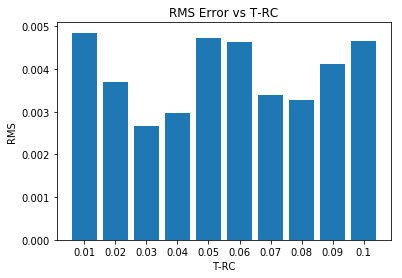

In [82]:
trc_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
rms_errors = []
np.random.seed(0)
for trc in trc_list:
    model = nengo.Network(label='T-RC')
    with model:
        neurons = nengo.Ensemble(N, dimensions=1,max_rates=Uniform(100,200),
                             neuron_type = nengo.LIFRate(tau_rc=trc, tau_ref= 0.002))
        connection = nengo.Connection(neurons, neurons)
    simulator = nengo.Simulator(model)
    x, A = nengo.utils.ensemble.tuning_curves(neurons, simulator)
    decoder = simulator.data[connection].weights.T
    xhat = np.dot(A, decoder)
    rms_errors.append(np.sqrt(np.average((x-xhat)**2)))

    
print('\nRMSE with T-RC :',trc_list,' are ',rms_errors, ' respectively.')

plt.bar(["0.01","0.02","0.03","0.04","0.05","0.06","0.07","0.08","0.09","0.1"],rms_errors)
plt.title("RMS Error vs T-RC")
plt.xlabel("T-RC")
plt.ylabel("RMS")
plt.show();

### Comment

As $\tau_{RC}$ increases the RMSE decreases until the time constant goes above 70ms 

At low tau RC levels, the RMSE is relatively high, but decreases to a point around 0.02, after which the RMSE levels off. For very large tau RC, the decaying exponentials which it defines become negligible; however for very small tau RC, the neurons ramp up very quickly and misfire, causing higher error in representation.

## 2) Connecting neurons

Make a second ensemble of spiking neurons.  It should have the same parameters as the first ensemble of neurons (from the first question), but have only 50 neurons in it.  Connect the first ensemble to the second such that it computes the identity function, using a post-synaptic time constant of 0.01.  Create an input that is a value of 1 for 0.1<t<0.4 seconds, and otherwise is zero (you can use a lambda function).

1. [1 mark] Show the input value and the decoded values from the two ensembles in three separate plots.  Run the simulation for 0.5 seconds.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

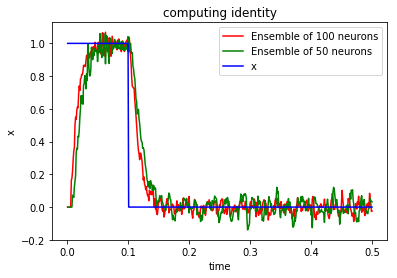

In [104]:
model = nengo.Network(label='connected ensembles')

with model:
    x = nengo.Node(lambda t: 1 if t <= 0.1 else 0)
    neurons_100 = nengo.Ensemble(100, dimensions=1,max_rates=Uniform(100,200))
    neurons_50 = nengo.Ensemble(50, dimensions=1,max_rates=Uniform(100,200))
    
    connection_100 = nengo.Connection(x,neurons_100)
    connection_50 = nengo.Connection(neurons_100, neurons_50)
    
    x_p = nengo.Probe(x)
    neurons_100_p = nengo.Probe(neurons_100, synapse=.01)
    neurons_50_p = nengo.Probe(neurons_50, synapse=.01)

simulator = nengo.Simulator(model)
simulator.run(0.5)

t = simulator.trange()

plt.figure()
plt.title('computing identity')
plt.plot(t, simulator.data[neurons_100_p],'r',label='Ensemble of 100 neurons')
plt.plot(t, simulator.data[neurons_50_p],'g',label='Ensemble of 50 neurons')
plt.plot(t, simulator.data[x_p],'b',label='x')
plt.ylabel("x")
plt.xlabel("time");
plt.legend()

2. [1 mark] Make a new version of the model where instead of computing the identity function, it computes `y=1-2*x`. Show the same graphs as in part (a).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

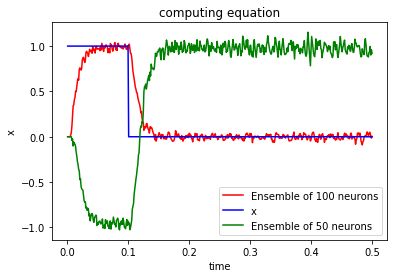

In [106]:
# T = 0.5
# tau_rc, tau_ref = 0.02, 0.002
# lif_model = nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref)
model = nengo.Network(label='Connected Neuron Ensemble')

with model:
    x = nengo.Node(lambda t: 1 if t <= 0.1 else 0)
    neurons_100= nengo.Ensemble(100, dimensions=1, max_rates=Uniform(100,200))
    neurons_50 = nengo.Ensemble(50, dimensions=1, max_rates=Uniform(100,200))
    connection_100 = nengo.Connection(x, neurons_100)
    connection_50 = nengo.Connection(neurons_100, neurons_50, function=lambda x: 1-2*x)
    
    x_p = nengo.Probe(x)
    neurons_100_p = nengo.Probe(neurons_100, synapse=.01)
    neurons_50_p = nengo.Probe(neurons_50, synapse=.01)

simulator = nengo.Simulator(model)
simulator.run(0.5)

t = sim.trange()
plt.figure()
plt.title('computing equation')
plt.plot(t, simulator.data[neurons_100_p],'r',label='Ensemble of 100 neurons')
plt.plot(t, simulator.data[x_p],'b',label='x')
plt.plot(t, simulator.data[neurons_50_p],'g',label='Ensemble of 50 neurons')
plt.ylabel("x")
plt.xlabel("time");
plt.legend()

## 3) Dynamics

Build a neural integrator.  This consists of one ensemble, one input, a connection from the input to the ensemble, and a connection from the ensemble back to itself.  The ensemble should have 200 neurons and the same parameters as in question 1.  The post-synaptic time constant of the recurrent connection is 0.05, and the post-synaptic time constant of the input is 0.005.  

To be an integrator, the desired dynamical system is ${{dx} \over {dt}} = u$.  To implement this with the NEF, we use the transformation discussed in class, so the feedback connection should compute $f'(x)=x$ and the input connection should compute $g'(x)=\tau u$, where $u$ is the input and $\tau$ is the post-synaptic time constant of the *feedback* connection.  So the feedback connection should compute the identity function and the input connection should compute 0.05 times the input.

For all probes, use a synapse of 0.01.  It can help to explicitly plot the ideal when answering the questions.

1. [1 mark] Show the input and the value represented by the ensemble when the input is a value of 0.9 from t=0.04 to t=1.0 (and 0 for other times).  Run the simulation for 1.5 seconds.  What is the expected ideal result (i.e. if we just mathematically computed the integral of the input, what would we get?)  How does the simulated output compare to that ideal

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

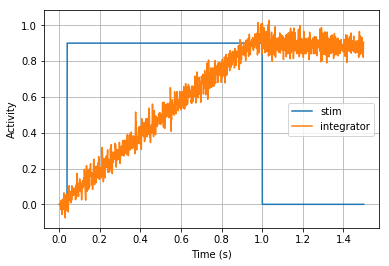

In [8]:
T = 1.5
N = 200
model = nengo.Network('Neural Integrator')

with model:
    stim = nengo.Node(lambda t: 0.9 if t >= 0.04 and t <= 1.0 else 0)
    ens = nengo.Ensemble(N, dimensions=1,max_rates=Uniform(100,200))
    
    def feedback(x):
        return 1*x
    
    conn = nengo.Connection(stim, ens, transform=0.05, synapse=0.005)
    conn = nengo.Connection(ens, ens, function=feedback, synapse=0.05)

    stim_p = nengo.Probe(stim)
    ens_p = nengo.Probe(ens, synapse=0.005)
    
sim = nengo.Simulator(model)
sim.run(T)

plt.plot(sim.trange(), sim.data[stim_p], label = "stim")
plt.plot(sim.trange(), sim.data[ens_p], label = "integrator")
plt.legend(loc="best");
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.grid('on')

2. [1 mark] Change the neural simulation to rate mode (use `model.config[nengo.Ensemble].neuron_type = nengo.LIFRate()` which will change all neurons in the simulation to LIF rate neurons).  Re-run the simulation in rate mode.  Show the resulting plots.  How does this compare to the result in part (a)?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

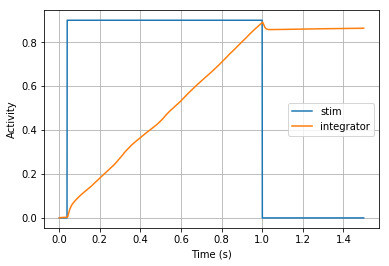

In [9]:
T = 1.5
N = 200

with model:
    ens.neuron_type=nengo.LIFRate()
    ens_p = nengo.Probe(ens, synapse=0.005)
    
sim = nengo.Simulator(model)
sim.run(T)

plt.plot(sim.trange(), sim.data[stim_p], label = "stim")
plt.plot(sim.trange(), sim.data[ens_p], label = "integrator")
plt.legend(loc="best");
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.grid('on')

3. [1 mark] Returning to spiking mode, change the input to be a value of 0.9 from t=0.04 to 0.16. Show the same plots as before (the input and the value represented by the ensemble over 1.5 seconds). How does this compare to (a)? Why is it better or worse?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

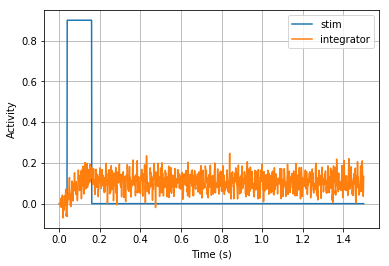

In [10]:
T = 1.5
N = 200
model = nengo.Network('Neural Integrator')

with model:
    stim = nengo.Node(lambda t: 0.9 if t >= 0.04 and t <= 0.16 else 0)
    ens = nengo.Ensemble(N, dimensions=1,
                         max_rates=Uniform(100,200))#,
#                          neuron_type = lif_model)
    
    def feedback(x):
        return 1*x
    
    conn = nengo.Connection(stim, ens, transform=0.05, synapse=0.005)
    conn = nengo.Connection(ens, ens, function=feedback, synapse=0.05)

    stim_p = nengo.Probe(stim)
    ens_p = nengo.Probe(ens, synapse=0.005)
    
sim = nengo.Simulator(model)
sim.run(T)

plt.plot(sim.trange(), sim.data[stim_p], label = "stim")
plt.plot(sim.trange(), sim.data[ens_p], label = "integrator")
plt.legend(loc="best");
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.grid('on')

4. [1 mark] Change the input to a ramp input from 0 to 0.9 from t=0 to t=0.45 (and 0 for t>0.45). Show the same plots as in the previous parts of this question. What does the ensemble end up representing, and why? What is the (ideal) equation for the curve traced out by the ensemble?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

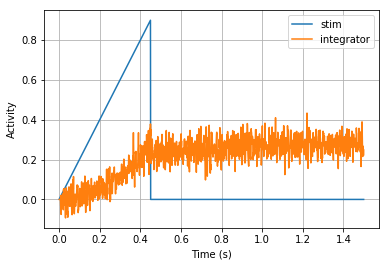

In [14]:
T = 1.5
N = 200
model = nengo.Network('Neural Integrator on Ramp Function')

with model:
    stim = nengo.Node(lambda t: 2*t if t <= 0.45 else 0)
    ens = nengo.Ensemble(N, dimensions=1,
                         max_rates=Uniform(100,200))#,
#                          neuron_type = lif_model)
    
    def feedback(x):
        return 1*x
    
    conn = nengo.Connection(stim, ens, transform=0.05, synapse=0.005)
    conn = nengo.Connection(ens, ens, function=feedback, synapse=0.05)

    stim_p = nengo.Probe(stim)
    ens_p = nengo.Probe(ens, synapse=0.005)
    
sim = nengo.Simulator(model)
sim.run(T)

plt.plot(sim.trange(), sim.data[stim_p], label = "stim")
plt.plot(sim.trange(), sim.data[ens_p], label = "integrator")
plt.legend(loc="best");
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.grid('on')

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

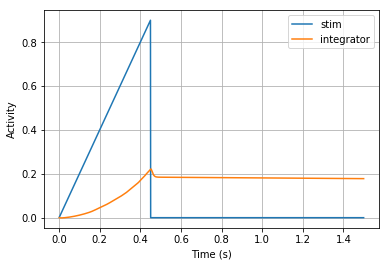

In [15]:
T = 1.5
N = 200

with model:
    ens.neuron_type=nengo.LIFRate()
    ens_p = nengo.Probe(ens, synapse=0.005)
    
sim = nengo.Simulator(model)
sim.run(T)

plt.plot(sim.trange(), sim.data[stim_p], label = "stim")
plt.plot(sim.trange(), sim.data[ens_p], label = "integrator")
plt.legend(loc="best");
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.grid('on')

5. [1 mark] Change the input to `5*sin(5*t)`. What should the value represented by the ensemble be (write the equation)? How well does it do? What are the differences between the model's behaviour and the expected ideal behaviour?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

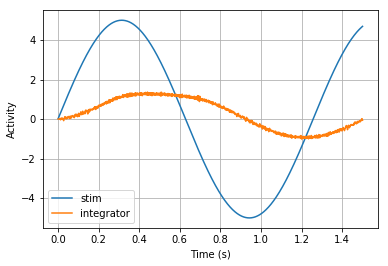

In [16]:
T = 1.5
N = 200
model = nengo.Network('Neural Integrator with LIF Rate Neurons')

with model:
    stim = nengo.Node(lambda t: 5*np.sin(5*t))
    ens = nengo.Ensemble(N, dimensions=1,
                         max_rates=Uniform(100,200))#,
#                          neuron_type = lif_model)
    
    def feedback(x):
        return 1*x
    
    conn = nengo.Connection(stim, ens, transform=0.05, synapse=0.005)
    conn = nengo.Connection(ens, ens, function=feedback, synapse=0.05)

    stim_p = nengo.Probe(stim)
    ens_p = nengo.Probe(ens, synapse=0.005)
    
sim = nengo.Simulator(model)
sim.run(T)

plt.plot(sim.trange(), sim.data[stim_p], label = "stim")
plt.plot(sim.trange(), sim.data[ens_p], label = "integrator")
plt.legend(loc="best");
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.grid('on')